In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# 觀察數據

In [3]:
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [4]:
print(digits.keys())
digits_data = digits.data
print('digis.data :', digits_data)
print('digis.data.shape :', digits_data.shape)
digits_target = digits.target
print('digis.target :', digits_target)
print('digis.targer.shape :', digits_target.shape)
print('digis.target_names :', digits.target_names)
digits_images = digits.images
print('digis.images :', digits_images)
print('digis.images.shape :', digits_images.shape)
#print('digis.DESCR :', digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
digis.data : [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
digis.data.shape : (1797, 64)
digis.target : [0 1 2 ... 8 9 8]
digis.targer.shape : (1797,)
digis.target_names : [0 1 2 3 4 5 6 7 8 9]
digis.images : [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0.

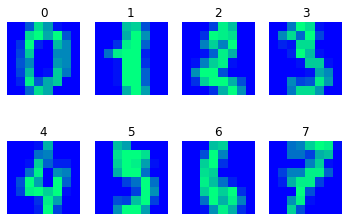

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for i, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.winter)
    plt.title(label)

In [7]:
from sklearn.model_selection  import train_test_split

In [8]:
x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(digits_data, digits.target, digits.images, test_size=0.2, random_state = 0)

# 改用SVC裡的SVM

In [33]:
from sklearn import svm

In [34]:
clf = svm.SVC(gamma = 'auto', kernel = 'linear')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

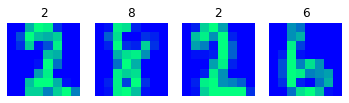

In [35]:
images_and_predictions = list(zip(images_test, y_predict))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.winter)
    plt.title(prediction)

# 觀察混淆矩陣

In [36]:
from sklearn import metrics

In [37]:
print(metrics.confusion_matrix(y_test, y_predict))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  1  1  0  0  0  0  0 37  0]
 [ 0  0  0  1  0  1  0  0  0 39]]


#  Isomap

In [38]:
from sklearn.manifold import Isomap

In [39]:
digits = datasets.load_digits()
digits_data = digits.data
x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(digits_data, digits.target, digits.images, test_size = 0.2, random_state = 0)
clf = svm.SVC(gamma = 'auto', kernel = 'linear')
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
x_iso = Isomap(n_neighbors = 10).fit_transform(x_train)
y_predict = clf.predict(x_train)

Text(0.5, 1.0, 'Actual Training Labels')

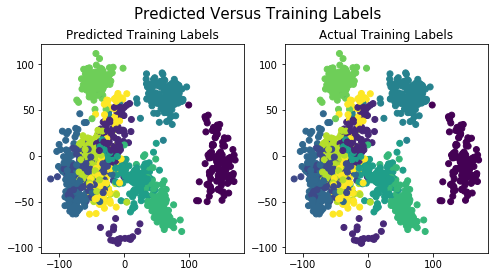

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
fig.suptitle('Predicted Versus Training Labels', fontsize = 15)
fig.subplots_adjust(top = 0.85)
ax[0].scatter(x_iso[:, 0], x_iso[:, 1], c = clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x_iso[:, 0], x_iso[:, 1], c = y_train)
ax[1].set_title('Actual Training Labels')

# 用SVM學習效果好很多